Summary:
    checked
    1. single cell.(I)
    2. 2 I cell network. (i!=j)
    2.5 more (10) cell ING network.
    3. PING (E&I).

    unchecked:
    1.

In [1]:
from brian2 import *
import numpy as np

In [7]:
# try I cell only first
start_scope()


N = 1

# Cm = 1*ufarad/cm**2
# El = -67*mV
# ENa = 50*mV
# EK = -100*mV
# gl = 0.1*msiemens/cm**2
# gNa = 100*msiemens/cm**2
# gK = 80*msiemens/cm**2
V_I = -80*mV
V_E = 0*mV

# gampa = 0.6*msiemens/cm**2
# ggaba = 0.6*msiemens/cm**2

# eqs = '''
# dv/dt = ( (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + Isyn))/Cm : volt
# Isyn = Igaba : amp*meter**-2
# Igaba = ggaba * (V_I - v) * sgaba_tot : amp*meter**-2
# sgaba_tot : 1
# m = alpham / (alpham + betam) :1
# dn/dt = alphan * (1-n) - betan * n : 1
# dh/dt = alphah * (1-h) - betah * h : 1
# alpham = (0.32/mV) * (v+54*mV) / (-exp((-v-54*mV) / (4*mV)) + 1)/ms : Hz
# betam = (0.28/mV) * (v+27*mV)/ (exp((v+27*mV)/(5*mV)) - 1)/ms : Hz
# alphah = (0.128) * exp(-(v+50*mV)/(18*mV))/ms : Hz
# betah = 4/(exp((-v-27*mV) / (5*mV)) + 1)/ms : Hz
# alphan = (0.032/mV) * (v+52*mV) / (-exp(-(v+52*mV) / (5*mV)) + 1)/ms : Hz
# betan = 0.5*exp(-(v+57*mV)/(40*mV))/ms : Hz
# '''

# Ecells = NeuronGroup(N, eqs, threshold='v>0*mV',
#                 method='euler')
# Ecells.v = -60*mV

# Me = StateMonitor(Ecells, 'v', record=1)


N = 1

Cm = 1*ufarad/cm**2
El = -65*mV
ENa = 55*mV
EK = -90*mV
gl = 0.1*msiemens/cm**2
gNa = 35*msiemens/cm**2
gK = 9*msiemens/cm**2
# a diff ggaba
ggaba = 0*msiemens/cm**2
I = 0.01*amp*meter**-2


eqs = '''
dv/dt = ( (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + Isyn + I))/Cm : volt
Isyn = Igaba : amp*meter**-2
#Isyn = Igaba + Iampa : amp*meter**-2
Igaba = ggaba * (V_I - v) * sgaba_tot : amp*meter**-2
#Iampa = gampa * (V_E - v) * sampa_tot : amp*meter**-2
#sampa_tot : 1
sgaba_tot : 1
m = alpham / (alpham + betam) :1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (v+35*mV) / (-exp((-v-35*mV) / (10*mV)) + 1)/ms : Hz
betam = 4 * exp(-(v+60*mV)/(18*mV))/ms : Hz
alphah = (0.35) * exp(-(v+58*mV)/(20*mV))/ms : Hz
betah = 5/(exp((-v-28*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.05/mV) * (v+34*mV) / (-exp(-(v+34*mV) / (10*mV)) + 1)/ms : Hz
betan = (0.625)*exp(-(v+44*mV)/(80*mV))/ms : Hz
'''

Icells = NeuronGroup(N, eqs, threshold='v>0*mV',
                method='euler')
Icells.v = -60*mV

MI = StateMonitor(Icells, 'v', record=True)


# Synapses
tausampar = 0.2*ms
tausampad = 2*ms
tausgabar = 0.5*ms
tausgabad = 10*ms

# eqs_ampa  = ''' 
# sampa_tot_post = w*sampa : 1 (summed)
# dsampa/dt= (1+tanh(v_pre/10))/2 * (1-sampa)/tausampar - sampa/tausampad : 1 (clock-driven)
# w : 1 # synaptic weight
# '''

eqs_gaba  = ''' 
sgaba_tot_post = w*sgaba : 1 (summed)
dsgaba/dt= (1+tanh(v_pre/10))/2 * (1-sgaba)/tausgabar - sgaba/tausgabad : 1 (clock-driven)
w : 1 # synaptic weight
'''

# # E to I, ampa
# C_E_I = Synapses(Ecells, Icells, model=eqs_ampa, method='euler')
# # C_E_I = Synapses(Ecells, Icells, model=eqs_ampa, method='euler')

# C_E_I.connect()
# C_E_I.w[:] = 1

# I to I
# C_I_I = Synapses(Icells, Icells, on_pre=eqs_gaba, method='euler')
# C_I_I.connect('i != j')
# C_I_I.connect()
# C_I_I.w[:] = 1


# # I to E
# C_I_E = Synapses(Icells, Ecells, on_pre=eqs_gaba, method='euler')
# C_I_E.connect()
# # C_I_E.w[:] = 1



# sp_E = SpikeMonitor(Ecells)
# sp_I = SpikeMonitor(Icells)
#dv/dt = ( (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + I +
 #       gei*(ve - v)))/Cm : volt

In [8]:
run(200*ms)


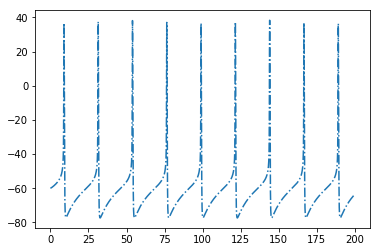

In [10]:
plot(MI.t/ms,MI.v[0]/mV,'-.')

without synapses, it works out

### Try adding synapses I-I
2 I cells, i!=j

In [30]:
# try I cell only first
start_scope()


N = 1

# Cm = 1*ufarad/cm**2
# El = -67*mV
# ENa = 50*mV
# EK = -100*mV
# gl = 0.1*msiemens/cm**2
# gNa = 100*msiemens/cm**2
# gK = 80*msiemens/cm**2
V_I = -80*mV
V_E = 0*mV

# gampa = 0.6*msiemens/cm**2
# ggaba = 0.6*msiemens/cm**2

# eqs = '''
# dv/dt = ( (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + Isyn))/Cm : volt
# Isyn = Igaba : amp*meter**-2
# Igaba = ggaba * (V_I - v) * sgaba_tot : amp*meter**-2
# sgaba_tot : 1
# m = alpham / (alpham + betam) :1
# dn/dt = alphan * (1-n) - betan * n : 1
# dh/dt = alphah * (1-h) - betah * h : 1
# alpham = (0.32/mV) * (v+54*mV) / (-exp((-v-54*mV) / (4*mV)) + 1)/ms : Hz
# betam = (0.28/mV) * (v+27*mV)/ (exp((v+27*mV)/(5*mV)) - 1)/ms : Hz
# alphah = (0.128) * exp(-(v+50*mV)/(18*mV))/ms : Hz
# betah = 4/(exp((-v-27*mV) / (5*mV)) + 1)/ms : Hz
# alphan = (0.032/mV) * (v+52*mV) / (-exp(-(v+52*mV) / (5*mV)) + 1)/ms : Hz
# betan = 0.5*exp(-(v+57*mV)/(40*mV))/ms : Hz
# '''

# Ecells = NeuronGroup(N, eqs, threshold='v>0*mV',
#                 method='euler')
# Ecells.v = -60*mV

# Me = StateMonitor(Ecells, 'v', record=1)


N = 2

Cm = 1*ufarad/cm**2
El = -65*mV
ENa = 55*mV
EK = -90*mV
gl = 0.1*msiemens/cm**2
gNa = 35*msiemens/cm**2
gK = 9*msiemens/cm**2
# a diff ggaba
ggaba = 0.2*msiemens/cm**2
I = 0.01*amp*meter**-2


eqs = '''
dv/dt = ( (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + Isyn + I))/Cm : volt
Isyn = Igaba : amp*meter**-2
#Isyn = Igaba + Iampa : amp*meter**-2
Igaba = ggaba * (V_I - v) * sgaba_tot : amp*meter**-2
#Iampa = gampa * (V_E - v) * sampa_tot : amp*meter**-2
#sampa_tot : 1
sgaba_tot : 1
m = alpham / (alpham + betam) :1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (v+35*mV) / (-exp((-v-35*mV) / (10*mV)) + 1)/ms : Hz
betam = 4 * exp(-(v+60*mV)/(18*mV))/ms : Hz
alphah = (0.35) * exp(-(v+58*mV)/(20*mV))/ms : Hz
betah = 5/(exp((-v-28*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.05/mV) * (v+34*mV) / (-exp(-(v+34*mV) / (10*mV)) + 1)/ms : Hz
betan = (0.625)*exp(-(v+44*mV)/(80*mV))/ms : Hz
'''

Icells = NeuronGroup(N, eqs, threshold='v>0*mV',
                method='euler')
Icells.v = -60*mV

MI = StateMonitor(Icells, 'v', record=True)


# Synapses
tausampar = 0.2*ms
tausampad = 2*ms
tausgabar = 0.5*ms
tausgabad = 10*ms

# eqs_ampa  = ''' 
# sampa_tot_post = w*sampa : 1 (summed)
# dsampa/dt= (1+tanh(v_pre/10))/2 * (1-sampa)/tausampar - sampa/tausampad : 1 (clock-driven)
# w : 1 # synaptic weight
# '''

eqs_gaba  = ''' 
sgaba_tot_post = sgaba : 1 (summed)
dsgaba/dt= (1+tanh(v_pre/mV/10))/2 * (1-sgaba)/tausgabar - sgaba/tausgabad : 1 (clock-driven)
w : 1 # synaptic weight
'''

# # E to I, ampa
# C_E_I = Synapses(Ecells, Icells, model=eqs_ampa, method='euler')
# # C_E_I = Synapses(Ecells, Icells, model=eqs_ampa, method='euler')

# C_E_I.connect()
# C_E_I.w[:] = 1

# I to I
C_I_I = Synapses(Icells, Icells, model=eqs_gaba, method='euler')
C_I_I.connect('i != j')
C_I_I.connect()
# C_I_I.w[:] = 1


# # I to E
# C_I_E = Synapses(Icells, Ecells, on_pre=eqs_gaba, method='euler')
# C_I_E.connect()
# # C_I_E.w[:] = 1



# sp_E = SpikeMonitor(Ecells)
# sp_I = SpikeMonitor(Icells)
#dv/dt = ( (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + I +
 #       gei*(ve - v)))/Cm : volt

In [31]:
run(200*ms,report='stdout')


Starting simulation at t=0. s for a duration of 200. ms
0.2 (100%) simulated in < 1s


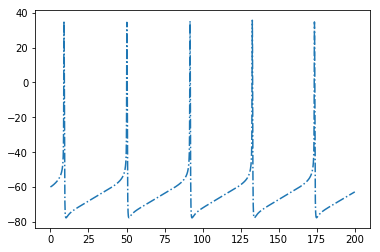

In [32]:
plot(MI.t/ms,MI.v[0]/mV,'-.')

more cells

Starting simulation at t=0. s for a duration of 200. ms
0.2 (100%) simulated in < 1s


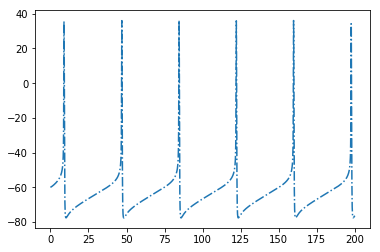

In [34]:
# try I cell only first
start_scope()


N = 1

# Cm = 1*ufarad/cm**2
# El = -67*mV
# ENa = 50*mV
# EK = -100*mV
# gl = 0.1*msiemens/cm**2
# gNa = 100*msiemens/cm**2
# gK = 80*msiemens/cm**2
V_I = -80*mV
V_E = 0*mV

# gampa = 0.6*msiemens/cm**2
# ggaba = 0.6*msiemens/cm**2

# eqs = '''
# dv/dt = ( (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + Isyn))/Cm : volt
# Isyn = Igaba : amp*meter**-2
# Igaba = ggaba * (V_I - v) * sgaba_tot : amp*meter**-2
# sgaba_tot : 1
# m = alpham / (alpham + betam) :1
# dn/dt = alphan * (1-n) - betan * n : 1
# dh/dt = alphah * (1-h) - betah * h : 1
# alpham = (0.32/mV) * (v+54*mV) / (-exp((-v-54*mV) / (4*mV)) + 1)/ms : Hz
# betam = (0.28/mV) * (v+27*mV)/ (exp((v+27*mV)/(5*mV)) - 1)/ms : Hz
# alphah = (0.128) * exp(-(v+50*mV)/(18*mV))/ms : Hz
# betah = 4/(exp((-v-27*mV) / (5*mV)) + 1)/ms : Hz
# alphan = (0.032/mV) * (v+52*mV) / (-exp(-(v+52*mV) / (5*mV)) + 1)/ms : Hz
# betan = 0.5*exp(-(v+57*mV)/(40*mV))/ms : Hz
# '''

# Ecells = NeuronGroup(N, eqs, threshold='v>0*mV',
#                 method='euler')
# Ecells.v = -60*mV

# Me = StateMonitor(Ecells, 'v', record=1)


N = 10

Cm = 1*ufarad/cm**2
El = -65*mV
ENa = 55*mV
EK = -90*mV
gl = 0.1*msiemens/cm**2
gNa = 35*msiemens/cm**2
gK = 9*msiemens/cm**2
# a diff ggaba
ggaba = 0.2*msiemens/cm**2
I = 0.01*amp*meter**-2


eqs = '''
dv/dt = ( (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + Isyn + I))/Cm : volt
Isyn = Igaba : amp*meter**-2
#Isyn = Igaba + Iampa : amp*meter**-2
Igaba = ggaba/(N-1) * (V_I - v) * sgaba_tot : amp*meter**-2
#Iampa = gampa * (V_E - v) * sampa_tot : amp*meter**-2
#sampa_tot : 1
sgaba_tot : 1
m = alpham / (alpham + betam) :1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (v+35*mV) / (-exp((-v-35*mV) / (10*mV)) + 1)/ms : Hz
betam = 4 * exp(-(v+60*mV)/(18*mV))/ms : Hz
alphah = (0.35) * exp(-(v+58*mV)/(20*mV))/ms : Hz
betah = 5/(exp((-v-28*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.05/mV) * (v+34*mV) / (-exp(-(v+34*mV) / (10*mV)) + 1)/ms : Hz
betan = (0.625)*exp(-(v+44*mV)/(80*mV))/ms : Hz
'''

Icells = NeuronGroup(N, eqs, threshold='v>0*mV',
                method='euler')
Icells.v = -60*mV

MI = StateMonitor(Icells, 'v', record=True)


# Synapses
tausampar = 0.2*ms
tausampad = 2*ms
tausgabar = 0.5*ms
tausgabad = 10*ms

# eqs_ampa  = ''' 
# sampa_tot_post = w*sampa : 1 (summed)
# dsampa/dt= (1+tanh(v_pre/10))/2 * (1-sampa)/tausampar - sampa/tausampad : 1 (clock-driven)
# w : 1 # synaptic weight
# '''

eqs_gaba  = ''' 
sgaba_tot_post = sgaba : 1 (summed)
dsgaba/dt= (1+tanh(v_pre/mV/10))/2 * (1-sgaba)/tausgabar - sgaba/tausgabad : 1 (clock-driven)
w : 1 # synaptic weight
'''

# # E to I, ampa
# C_E_I = Synapses(Ecells, Icells, model=eqs_ampa, method='euler')
# # C_E_I = Synapses(Ecells, Icells, model=eqs_ampa, method='euler')

# C_E_I.connect()
# C_E_I.w[:] = 1

# I to I
C_I_I = Synapses(Icells, Icells, model=eqs_gaba, method='euler')
C_I_I.connect('i != j')
C_I_I.connect()
# C_I_I.w[:] = 1


# # I to E
# C_I_E = Synapses(Icells, Ecells, on_pre=eqs_gaba, method='euler')
# C_I_E.connect()
# # C_I_E.w[:] = 1



# sp_E = SpikeMonitor(Ecells)
# sp_I = SpikeMonitor(Icells)
#dv/dt = ( (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + I +
 #       gei*(ve - v)))/Cm : volt
    
run(200*ms,report='stdout')
plot(MI.t/ms,MI.v[0]/mV,'-.')

In [36]:
# try I cell only first
start_scope()


Ne = 8
Ni = 2

Cm = 1*ufarad/cm**2
El = -67*mV
ENa = 50*mV
EK = -100*mV
gl = 0.1*msiemens/cm**2
gNa = 100*msiemens/cm**2
gK = 80*msiemens/cm**2
V_I = -80*mV
V_E = 0*mV

gampa = 0.6*msiemens/cm**2
ggaba = 0.6*msiemens/cm**2

I = 0*amp*meter**-2

eqs = '''
dv/dt = ( (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + Isyn + I))/Cm : volt
Isyn = Igaba : amp*meter**-2
Igaba = ggaba/Ni * (V_I - v) * sgaba_tot : amp*meter**-2
sgaba_tot : 1
m = alpham / (alpham + betam) :1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.32/mV) * (v+54*mV) / (-exp((-v-54*mV) / (4*mV)) + 1)/ms : Hz
betam = (0.28/mV) * (v+27*mV)/ (exp((v+27*mV)/(5*mV)) - 1)/ms : Hz
alphah = (0.128) * exp(-(v+50*mV)/(18*mV))/ms : Hz
betah = 4/(exp((-v-27*mV) / (5*mV)) + 1)/ms : Hz
alphan = (0.032/mV) * (v+52*mV) / (-exp(-(v+52*mV) / (5*mV)) + 1)/ms : Hz
betan = 0.5*exp(-(v+57*mV)/(40*mV))/ms : Hz
'''

Ecells = NeuronGroup(Ne, eqs, threshold='v>0*mV',
                method='euler')
Ecells.v = -60*mV

Me = StateMonitor(Ecells, 'v', record=True)



Cm = 1*ufarad/cm**2
El = -65*mV
ENa = 55*mV
EK = -90*mV
gl = 0.1*msiemens/cm**2
gNa = 35*msiemens/cm**2
gK = 9*msiemens/cm**2
# a diff ggaba
ggaba = 0.2*msiemens/cm**2
I = 0.01*amp*meter**-2


eqs = '''
dv/dt = ( (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + Isyn + I))/Cm : volt
#Isyn = Igaba : amp*meter**-2
Isyn = Igaba + Iampa : amp*meter**-2
Igaba = ggaba/(Ni-1) * (V_I - v) * sgaba_tot : amp*meter**-2
Iampa = gampa/Ne * (V_E - v) * sampa_tot : amp*meter**-2
sampa_tot : 1
sgaba_tot : 1
m = alpham / (alpham + betam) :1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (v+35*mV) / (-exp((-v-35*mV) / (10*mV)) + 1)/ms : Hz
betam = 4 * exp(-(v+60*mV)/(18*mV))/ms : Hz
alphah = (0.35) * exp(-(v+58*mV)/(20*mV))/ms : Hz
betah = 5/(exp((-v-28*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.05/mV) * (v+34*mV) / (-exp(-(v+34*mV) / (10*mV)) + 1)/ms : Hz
betan = (0.625)*exp(-(v+44*mV)/(80*mV))/ms : Hz
'''

Icells = NeuronGroup(Ni, eqs, threshold='v>0*mV',
                method='euler')
Icells.v = -60*mV

MI = StateMonitor(Icells, 'v', record=True)


# Synapses
tausampar = 0.2*ms
tausampad = 2*ms
tausgabar = 0.5*ms
tausgabad = 10*ms

eqs_ampa  = ''' 
sampa_tot_post = sampa : 1 (summed)
dsampa/dt= (1+tanh(v_pre/mV/10))/2 * (1-sampa)/tausampar - sampa/tausampad : 1 (clock-driven)
w : 1 # synaptic weight
'''

eqs_gaba  = ''' 
sgaba_tot_post = sgaba : 1 (summed)
dsgaba/dt= (1+tanh(v_pre/mV/10))/2 * (1-sgaba)/tausgabar - sgaba/tausgabad : 1 (clock-driven)
w : 1 # synaptic weight
'''

# # E to I, ampa
C_E_I = Synapses(Ecells, Icells, model=eqs_ampa, method='euler')
# # C_E_I = Synapses(Ecells, Icells, model=eqs_ampa, method='euler')
C_E_I.connect()
# C_E_I.w[:] = 1

# I to I
C_I_I = Synapses(Icells, Icells, model=eqs_gaba, method='euler')
C_I_I.connect('i != j')
C_I_I.connect()
# C_I_I.w[:] = 1


# # I to E
C_I_E = Synapses(Icells, Ecells, model=eqs_gaba, method='euler')
C_I_E.connect()
# # C_I_E.w[:] = 1



sp_E = SpikeMonitor(Ecells)
sp_I = SpikeMonitor(Icells)
#dv/dt = ( (gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) + I +
 #       gei*(ve - v)))/Cm : volt

Starting simulation at t=0. s for a duration of 200. ms
0.2 (100%) simulated in < 1s


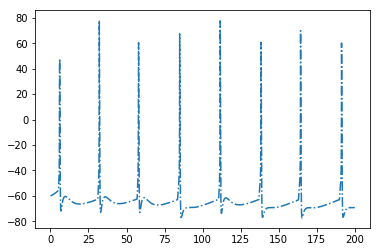

In [37]:
run(200*ms,report='stdout')


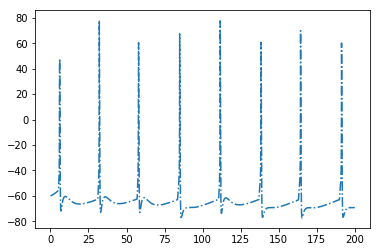

In [39]:
plot(Me.t/ms,MI.v[0]/mV,'-.')